# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

### Business Understanding

The market for Used Cars was valued at USD 195.84 billion in 2021, and it is projected to reach USD 302.47 billion by 2027 - CAGR 7.5%. (Source: https://www.mordorintelligence.com/industry-reports/united-states-used-car-market/market-size). Dealership networks are a critical player in this industry by establishing brand recognition and making used car options viable, primarily for the middle-class population.

The goal of this anlaysis is to determine what factors in a used car are valued by potential buyers which will ultimately determine the price of the used car. This will help used car dealers to deivise strategies to improve the profitability and growth

#### Objectives of this study 

-  Understand the relationship between various features of the used car and price
-  Build and evaluate multiple regression models to predict price of a used car
-  Provide actionable insights to used car dealers based on model



### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [80]:
#load the dataset
cars = pd.read_csv('data/vehicles.csv')
cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


#### Exploratory Data Analysis

In [34]:
# Display basic information
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [35]:
# Display descriptive statistics (removed scientific notation)
cars.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,id,price,year,odometer
count,426880,426880,425675,422480
mean,7.31149e+09,75199,2011.24,98043.3
std,4.47317e+06,1.21823e+07,9.45212,213882
min,7.20741e+09,0,1900,0
25%,7.30814e+09,5900,2008,37704
50%,7.31262e+09,13950,2013,85548
75%,7.31525e+09,26485.8,2017,133542
max,7.3171e+09,3.73693e+09,2022,1e+07


In [36]:
# Check for missing values
cars.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [37]:
#percent of rows which are empty for each column
print( "#"*40,"\nPercent of missing :\n\n", round(cars.isna().sum() / cars.isna().count() * 100, 2)) # looking at columns with most Missing Values

######################################## 
Percent of missing :

 id               0.00
region           0.00
price            0.00
year             0.28
manufacturer     4.13
model            1.24
condition       40.79
cylinders       41.62
fuel             0.71
odometer         1.03
title_status     1.93
transmission     0.60
VIN             37.73
drive           30.59
size            71.77
type            21.75
paint_color     30.50
state            0.00
dtype: float64


In [38]:
# distinct values within each column to asses need for encoding and type of encoding to be chosen
for col in cars:
    print(col + ": " + str(cars[col].nunique()))
    if (cars[col].nunique()<50):
        print(cars[col].unique())
    print('\n')

id: 426880


region: 404


price: 15655


year: 114


manufacturer: 42
[nan 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'ferrari' 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mercury'
 'harley-davidson' 'datsun' 'aston-martin' 'land rover' 'morgan']


model: 29649


condition: 6
[nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']


cylinders: 8
[nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']


fuel: 5
[nan 'gas' 'other' 'diesel' 'hybrid' 'electric']


odometer: 104870


title_status: 6
[nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']


transmission: 3
[nan 'other' 'automatic' 'manual']


VIN: 118246


drive: 3
[nan 'rwd' '4wd' 'fwd']


size: 4
[nan 'full-size' 'mid-size'

In [39]:
#display
print(cars.year.unique())

[  nan 2014. 2010. 2020. 2017. 2013. 2012. 2016. 2019. 2011. 1992. 2018.
 2004. 2015. 2001. 2006. 1968. 2003. 2008. 2007. 2005. 1966. 2009. 1998.
 2002. 1999. 2021. 1997. 1976. 1969. 1995. 1978. 1954. 1979. 1970. 1974.
 1996. 1987. 2000. 1955. 1960. 1991. 1972. 1988. 1994. 1929. 1984. 1986.
 1989. 1973. 1946. 1933. 1958. 1937. 1985. 1957. 1953. 1942. 1963. 1977.
 1993. 1903. 1990. 1965. 1982. 1948. 1983. 1936. 1932. 1951. 1931. 1980.
 1967. 1971. 1947. 1981. 1926. 1962. 1975. 1964. 1934. 1952. 1940. 1959.
 1950. 1930. 1956. 1922. 1928. 2022. 1901. 1941. 1924. 1927. 1939. 1923.
 1949. 1961. 1935. 1918. 1900. 1938. 1913. 1916. 1943. 1925. 1921. 1915.
 1945. 1902. 1905. 1920. 1944. 1910. 1909.]


In [40]:
# determine the number of duplicate rows where both vin# and odometer reading is the same. 
cars.duplicated(subset=['VIN','odometer']).sum()
#Initial hyptheses is if the vin # and odometer rating the same it could be bad data or purely duplicates that need to be removed
#on further analysis, lot of duplicates appear due to missing values in col VIN and Odometer


266498

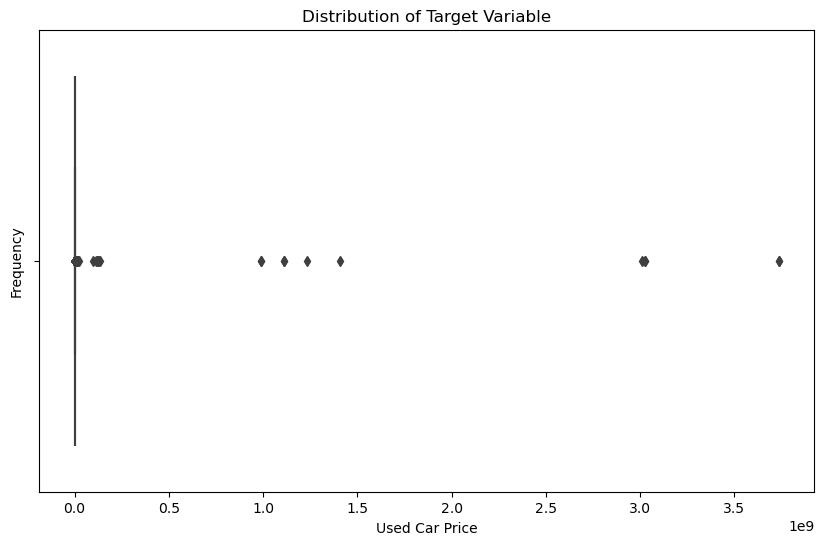

In [41]:
# Visualize the distribution of the target variable - Box plot of the target variable used car price
plt.figure(figsize=(10, 6))
sns.boxplot(x=cars['price'])
plt.title('Distribution of Target Variable')
plt.xlabel('Used Car Price')
plt.ylabel('Frequency')
plt.show()

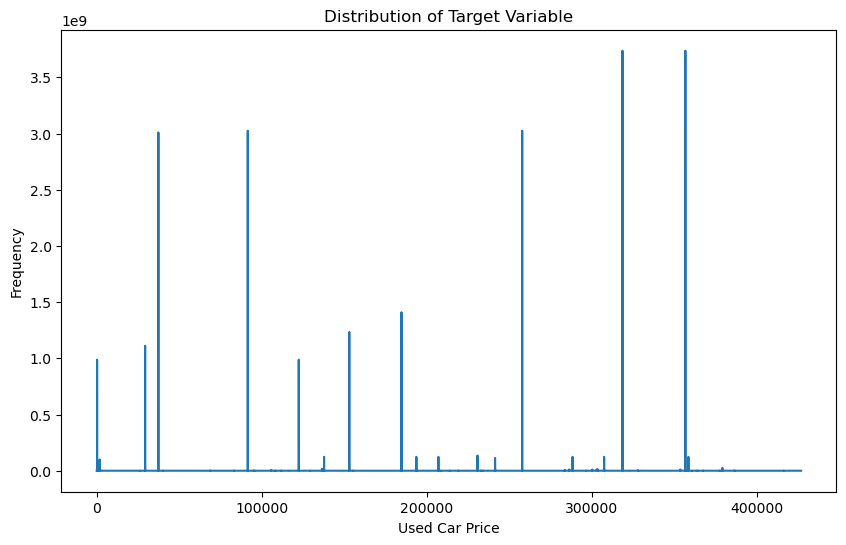

In [90]:
#isualize the distribution of the target variable - Hist plot of the target variable used car price
plt.figure(figsize=(10, 6))
fig = plt.plot(cars['price'])
plt.title('Distribution of Target Variable')
plt.xlabel('Used Car Price')
plt.ylabel('Frequency')
plt.savefig("images/targetvardistri.png")
#fig.update_yaxes(exponentformat="none")
plt.show()


In [43]:
#analyse outlier for car price - all rows with price above 95 percentile of the price 
cars[cars['price']> cars['price'].quantile(0.95)]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
158,7302537532,auburn,52990,2020.0,jaguar,e-pace p300 r-dynamic se,good,NaN,gas,79.0,clean,other,SADFL2GX2L1Z91107,NaN,NaN,other,white,al
204,7316691442,birmingham,58977,2019.0,gmc,sierra 3500,NaN,NaN,gas,66368.0,clean,automatic,1GT42WEY6KF184860,4wd,NaN,NaN,white,al
220,7316423933,birmingham,53000,2006.0,NaN,Sterling Acterra,NaN,NaN,diesel,160322.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,al
243,7316206718,birmingham,45900,2017.0,NaN,Maserati Levante,NaN,6 cylinders,gas,36083.0,clean,automatic,ZN661XUA1HX210904,NaN,NaN,SUV,white,al
260,7316031977,birmingham,45000,2017.0,chevrolet,silverado,excellent,8 cylinders,gas,92000.0,clean,automatic,NaN,4wd,full-size,truck,red,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426837,7302284209,wyoming,54999,2017.0,NaN,2017,NaN,NaN,diesel,103000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wy
426839,7302191669,wyoming,54999,2017.0,NaN,2017,NaN,NaN,gas,119000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wy
426840,7302181162,wyoming,65999,2017.0,NaN,2017,NaN,NaN,diesel,73000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wy
426858,7301953587,wyoming,51990,2020.0,cadillac,xt6 premium luxury,good,6 cylinders,gas,6814.0,clean,other,1GYKPCRS2LZ197998,fwd,NaN,other,black,wy


In [44]:
#analyse outlier for car year data - all rows with years below 10 percentile of the year data 
cars[cars['year']< cars['year'].quantile(0.1)]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
37,7316130053,auburn,4500,1992.0,jeep,cherokee,excellent,6 cylinders,gas,192000.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,al
65,7312847466,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,NaN,rwd,full-size,truck,white,al
101,7309160821,auburn,12990,1968.0,volvo,NaN,NaN,NaN,gas,99999.0,clean,manual,NaN,NaN,NaN,NaN,NaN,al
137,7305082143,auburn,2500,1966.0,NaN,1966 C-30 1 ton,good,6 cylinders,gas,47000.0,clean,manual,NaN,rwd,full-size,pickup,brown,al
171,7316873897,birmingham,5900,2001.0,NaN,F-350,NaN,8 cylinders,diesel,200000.0,clean,automatic,NaN,rwd,NaN,NaN,NaN,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426813,7302839732,wyoming,1000,1998.0,ford,explorer,NaN,6 cylinders,gas,190000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wy
426815,7302634053,wyoming,5000,1996.0,NaN,96 Suburban,excellent,8 cylinders,gas,170000.0,clean,automatic,NaN,NaN,NaN,SUV,brown,wy
426831,7302384818,wyoming,9800,1985.0,nissan,300zx coupe with t-tops,like new,6 cylinders,gas,115000.0,clean,automatic,NaN,rwd,sub-compact,hatchback,red,wy
426833,7302338378,wyoming,6800,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,SAJGX2749VCOO8376,rwd,compact,convertible,white,wy


In [45]:
#analyse outlier for odomometer reading  - all rows with reading above 95 percentile of the price or less than 1000
cars[cars['odometer']< cars['odometer'].quantile(0.95)]
cars.query('odometer <1000')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
84,7310803539,auburn,28990,2020.0,buick,encore gx essence sport,good,NaN,gas,21.0,clean,other,KL4MMGSL4LB128069,NaN,NaN,other,white,al
158,7302537532,auburn,52990,2020.0,jaguar,e-pace p300 r-dynamic se,good,NaN,gas,79.0,clean,other,SADFL2GX2L1Z91107,NaN,NaN,other,white,al
208,7316644188,birmingham,2500,1976.0,chevrolet,malibu classic,NaN,NaN,gas,100.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,al
242,7316211151,birmingham,0,2014.0,NaN,Freightliner Cascadia,NaN,NaN,diesel,100.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,al
277,7315873690,birmingham,31990,2017.0,jeep,wrangler sport s utility 2d,good,6 cylinders,gas,891.0,clean,other,1C4AJWAG1HL698869,4wd,NaN,other,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426682,7305969547,wyoming,17873,2018.0,NaN,Thunder Creek Fuel Trailer MT2,NaN,NaN,NaN,501.0,clean,NaN,56ZL1UJ20KP000149,NaN,NaN,other,custom,wy
426714,7305434508,wyoming,33950,2019.0,ford,mustang,like new,4 cylinders,gas,300.0,clean,automatic,NaN,NaN,full-size,convertible,blue,wy
426740,7304047946,wyoming,41990,2020.0,ford,mustang gt coupe 2d,good,8 cylinders,gas,561.0,clean,other,1FA6P8CFXL5169606,rwd,NaN,coupe,white,wy
426764,7303347225,wyoming,0,2018.0,NaN,peterbilt 579,NaN,NaN,diesel,1.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wy


/var/folders/88/d_kfpgt52l5g1ltyj3ff4rcw0000gq/T/ipykernel_98263/1760956268.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['year']).set(title = 'Year of used cars')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


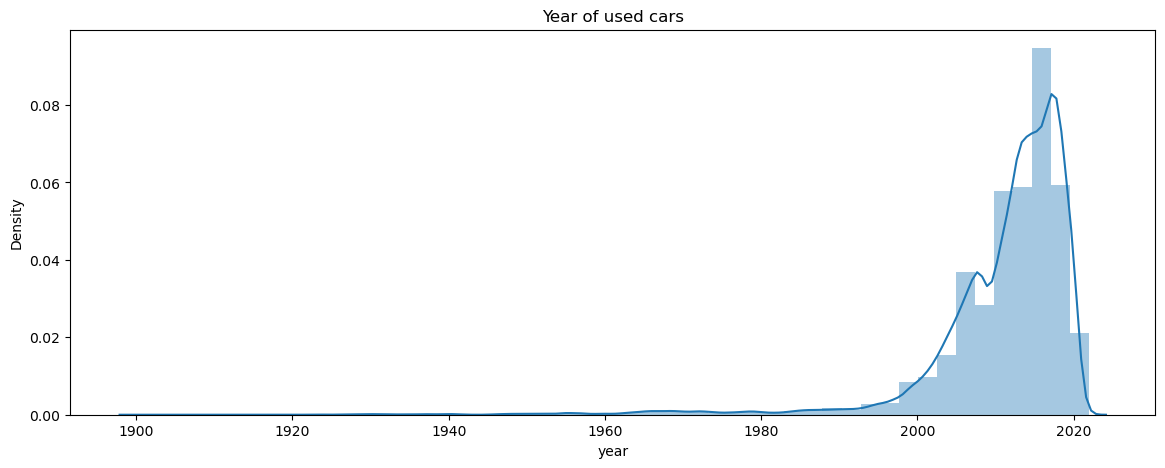

In [46]:
#visualize distribution of year data
plt.figure(figsize=(14,5))
sns.distplot(cars['year']).set(title = 'Year of used cars')
plt.show()

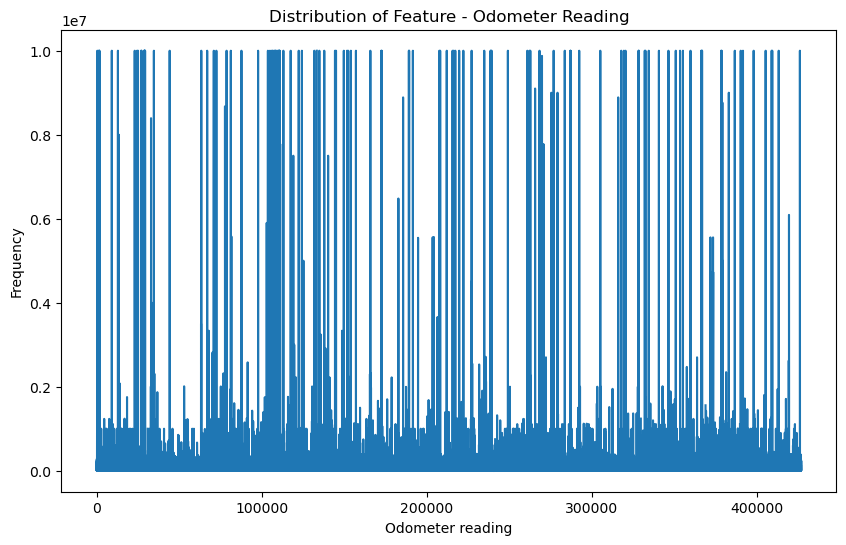

In [47]:
#Hist plot of the feature odometer
plt.figure(figsize=(10, 6))
plt.plot(cars['odometer'])
plt.title('Distribution of Feature - Odometer Reading')
plt.xlabel('Odometer reading')
plt.ylabel('Frequency')
plt.show()

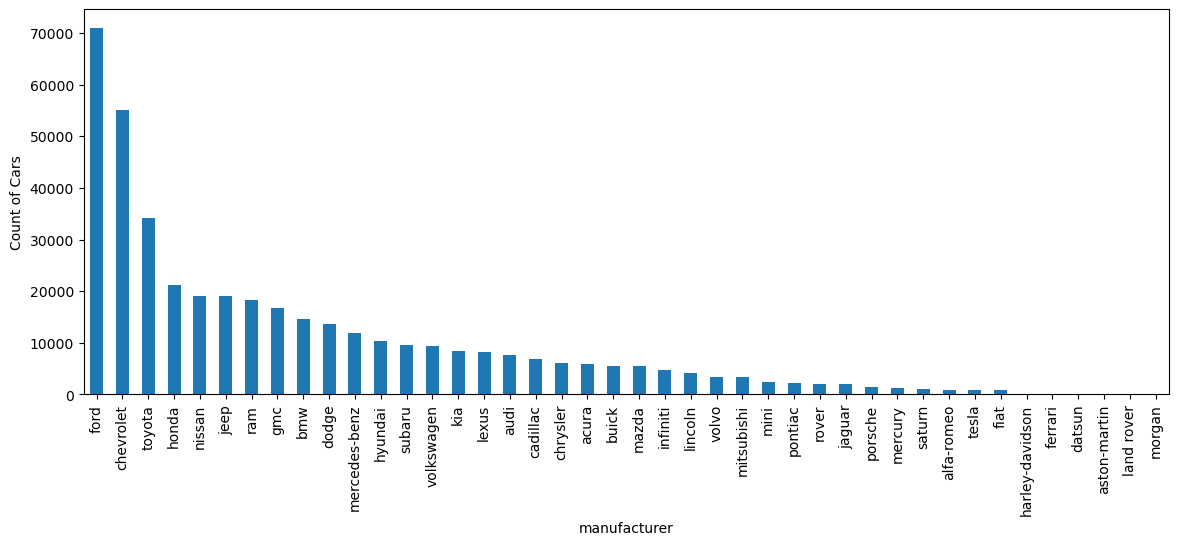

In [48]:
#visualize distribution of manufacturer data
plt.figure(figsize=(14,5))
plt.ylabel('Count of Cars')
cars['manufacturer'].value_counts().plot(kind='bar')
plt.show()

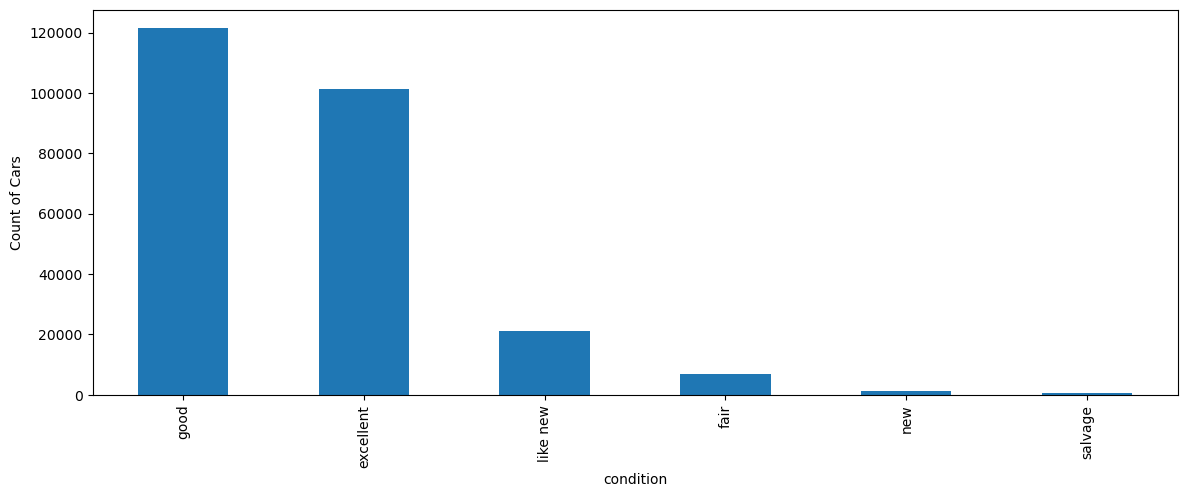

In [49]:
#visualize distribution of condition data
plt.figure(figsize=(14,5))
plt.ylabel('Count of Cars')
cars['condition'].value_counts().plot(kind='bar')
plt.show()

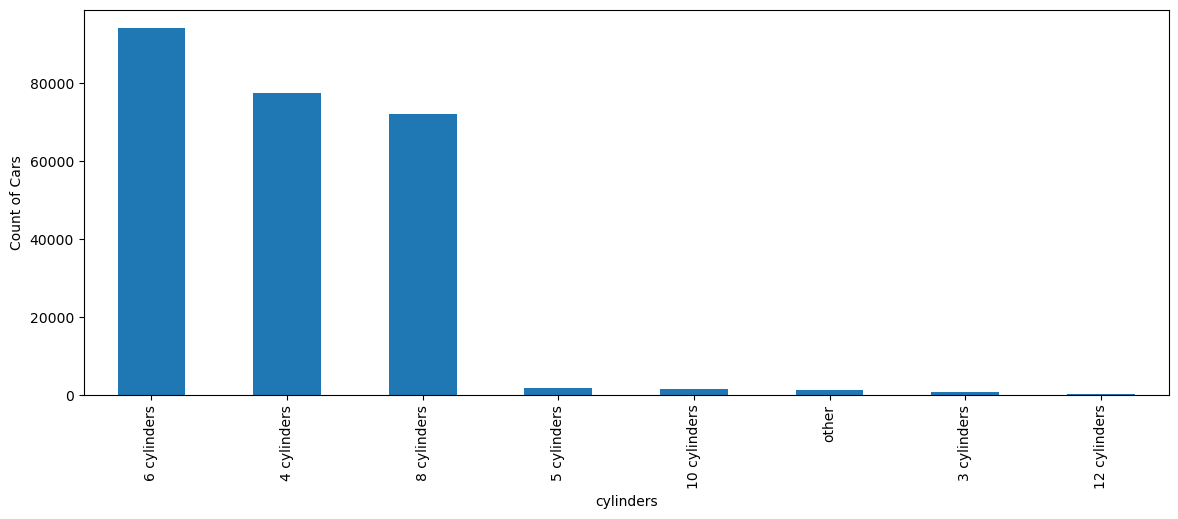

In [50]:
#visualize distribution of cylinder data
plt.figure(figsize=(14,5))
plt.ylabel('Count of Cars')
cars['cylinders'].value_counts().plot(kind='bar')
plt.show()

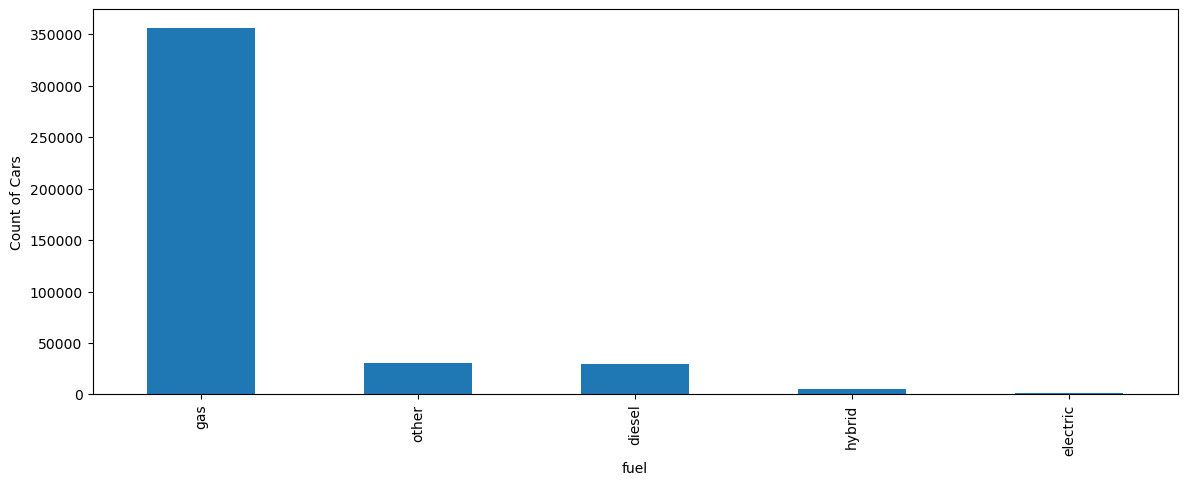

In [51]:
#visualize distribution of Fuel data
plt.figure(figsize=(14,5))
plt.ylabel('Count of Cars')
cars['fuel'].value_counts().plot(kind='bar')
plt.show()

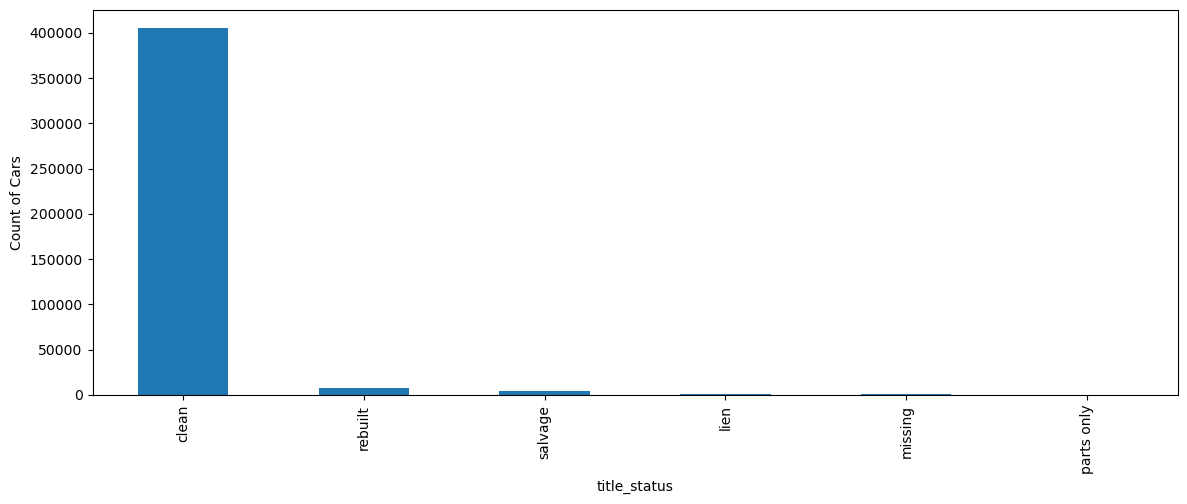

In [52]:
#visualize distribution of Title status data
plt.figure(figsize=(14,5))
plt.ylabel('Count of Cars')
cars['title_status'].value_counts().plot(kind='bar')
plt.show()

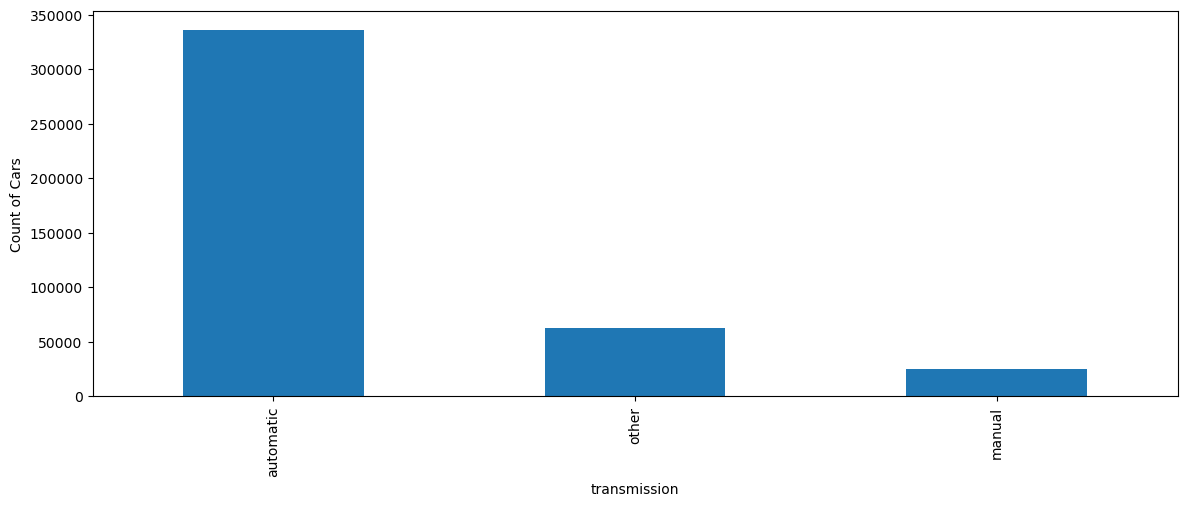

In [53]:
#visualize distribution of Transmission data
plt.figure(figsize=(14,5))
plt.ylabel('Count of Cars')
cars['transmission'].value_counts().plot(kind='bar')
plt.show()

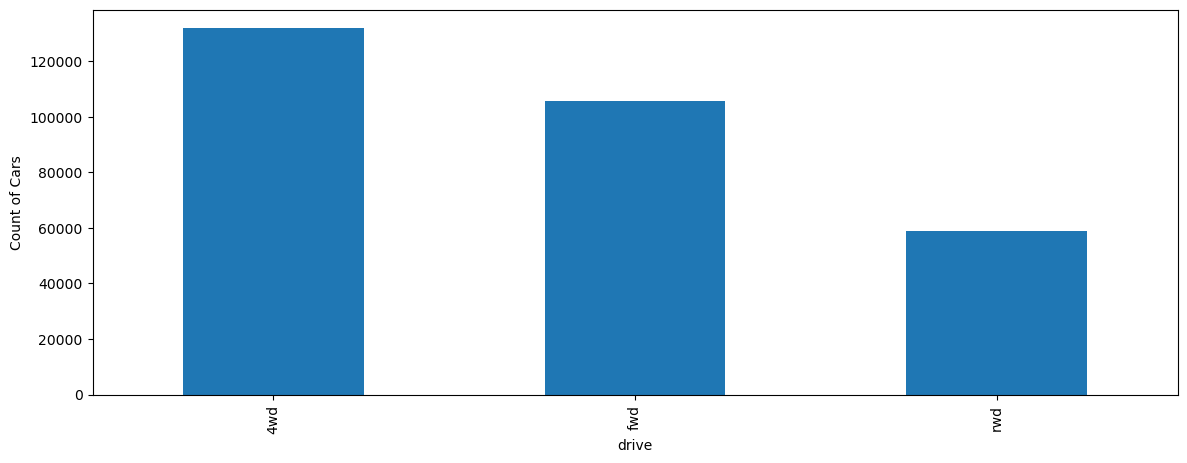

In [54]:
#visualize distribution of drive data
plt.figure(figsize=(14,5))
plt.ylabel('Count of Cars')
cars['drive'].value_counts().plot(kind='bar')
plt.show()

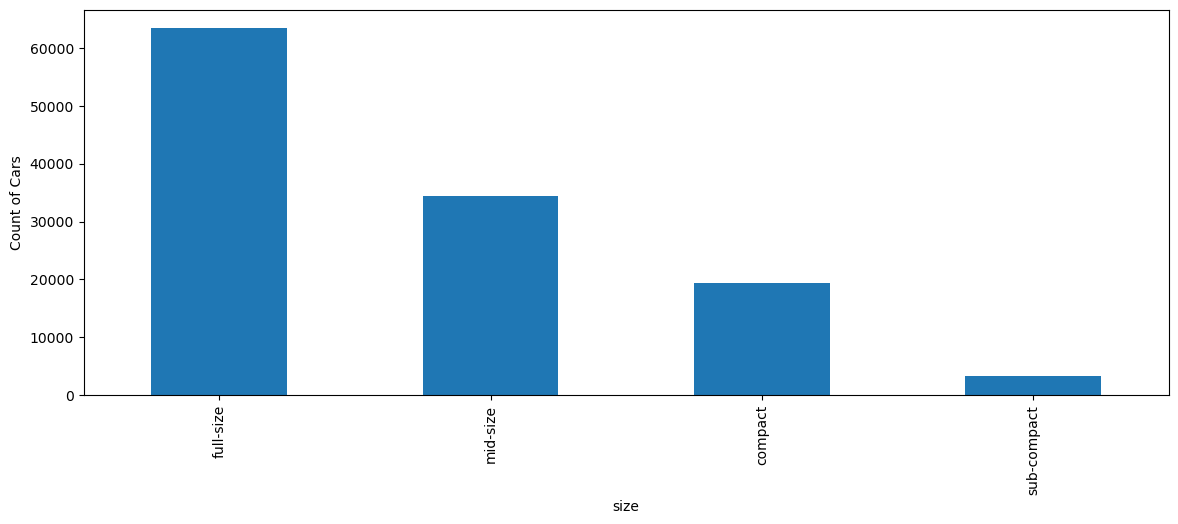

In [55]:
#visualize distribution of size data
plt.figure(figsize=(14,5))
plt.ylabel('Count of Cars')
cars['size'].value_counts().plot(kind='bar')
plt.show()

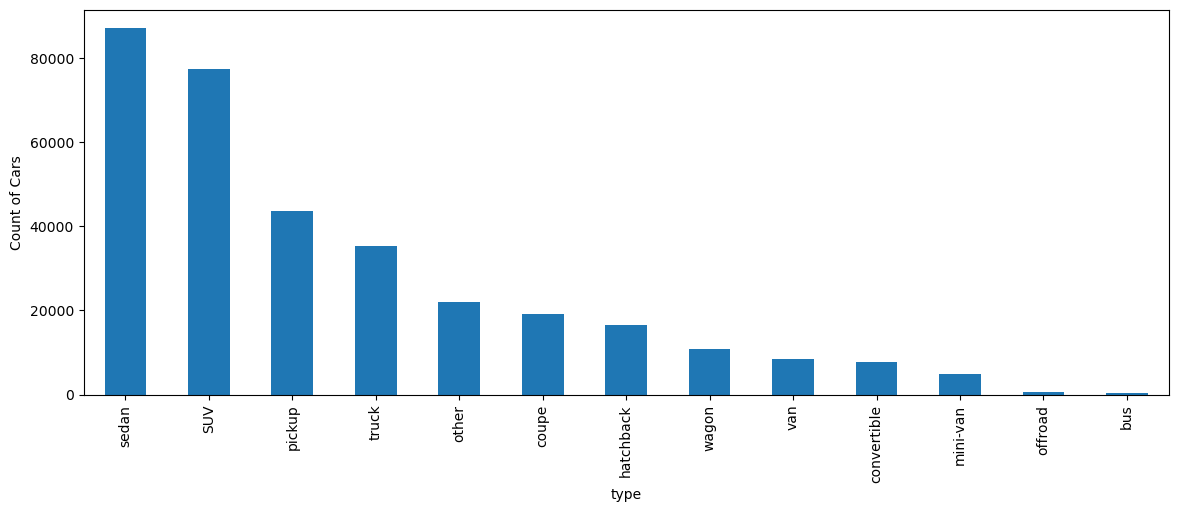

In [56]:
#visualize distribution of type data
plt.figure(figsize=(14,5))
plt.ylabel('Count of Cars')
cars['type'].value_counts().plot(kind='bar')
plt.show()

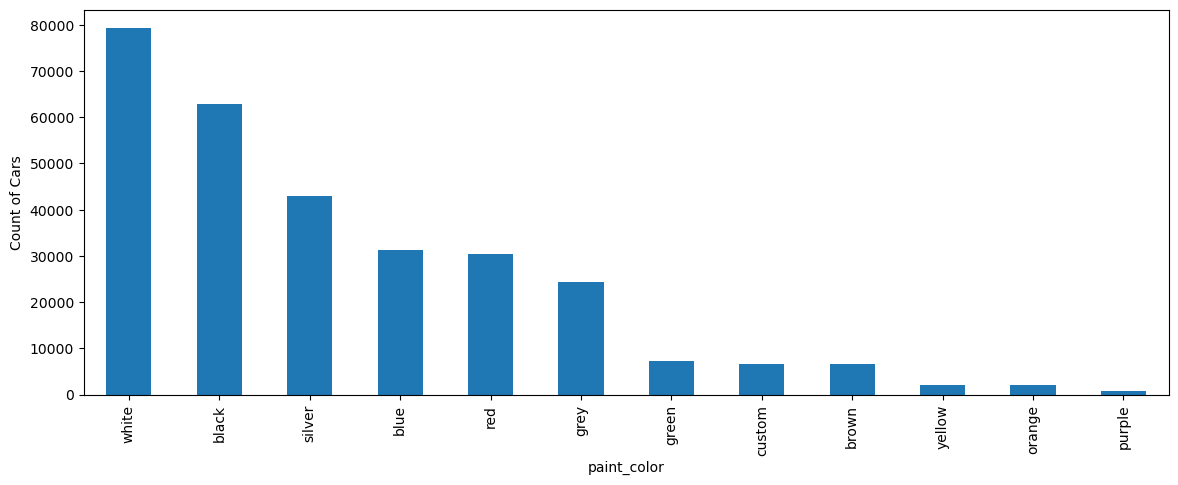

In [57]:
#visualize distribution of paint data
plt.figure(figsize=(14,5))
plt.ylabel('Count of Cars')
cars['paint_color'].value_counts().plot(kind='bar')
plt.show()

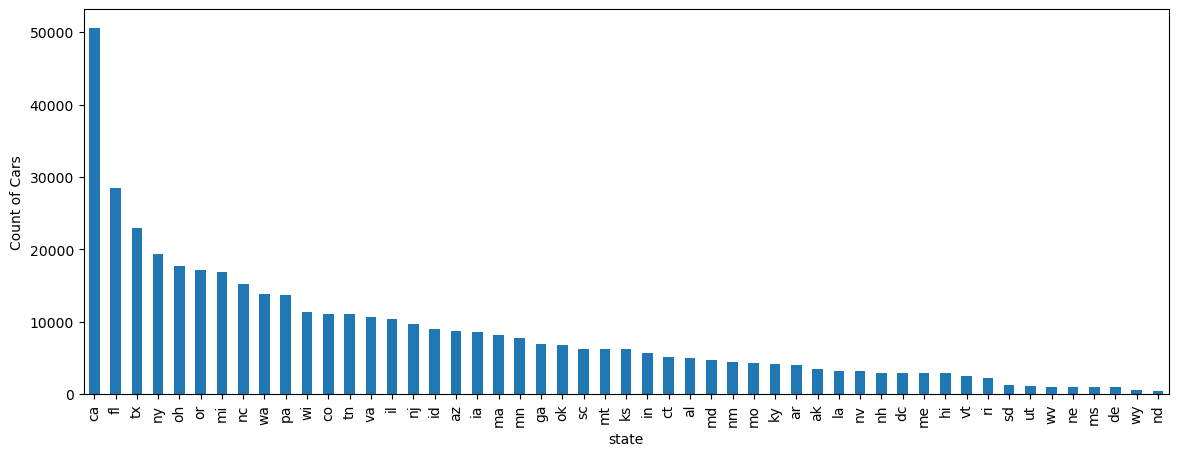

In [58]:
#visualize distribution of state data
plt.figure(figsize=(14,5))
plt.ylabel('Count of Cars')
cars['state'].value_counts().plot(kind='bar')
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 421344 entries, 27 to 426879
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   price     421344 non-null  int64  
 1   year      421344 non-null  float64
 2   odometer  421344 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 12.9 MB


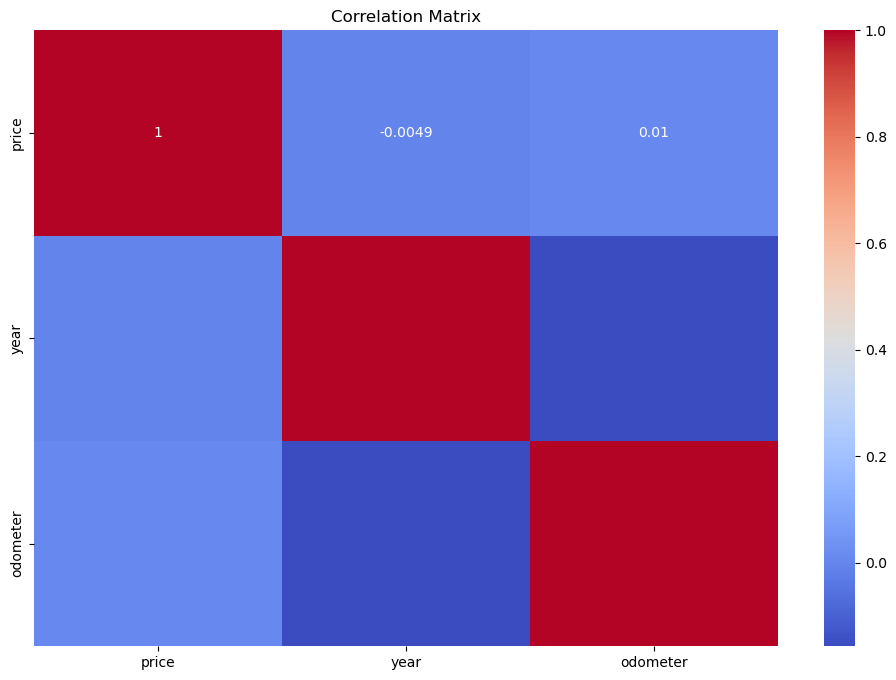

In [59]:
# Visualize correlations between numeric columns
cars_num = cars[['price', 'year','odometer']].dropna()
cars_num.info()
plt.figure(figsize=(12, 8))
sns.heatmap(cars_num.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [60]:
# Set a threshold based on the U.S 2023 average
threshold = 45000

# Filter out prices above the threshold
cars = cars[cars['price'] <= threshold]
print(cars.head(10))
print(cars.info())

# Filter out prices below 5k
car_prices = cars['price'].dropna()
cars = cars[(cars['price'] <= threshold) & (cars['price'] > 5000)]


           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   
5  7222379453           hudson valley   1600   NaN          NaN   NaN   
6  7221952215           hudson valley   1000   NaN          NaN   NaN   
7  7220195662           hudson valley  15995   NaN          NaN   NaN   
8  7209064557         medford-ashland   5000   NaN          NaN   NaN   
9  7219485069                    erie   3000   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN      

In [61]:
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
Index: 310243 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            310243 non-null  int64  
 1   region        310243 non-null  object 
 2   price         310243 non-null  int64  
 3   year          309516 non-null  float64
 4   manufacturer  299442 non-null  object 
 5   model         307490 non-null  object 
 6   condition     194577 non-null  object 
 7   cylinders     180601 non-null  object 
 8   fuel          307897 non-null  object 
 9   odometer      308468 non-null  float64
 10  title_status  304708 non-null  object 
 11  transmission  308699 non-null  object 
 12  VIN           206478 non-null  object 
 13  drive         217640 non-null  object 
 14  size          82324 non-null   object 
 15  type          250653 non-null  object 
 16  paint_color   225716 non-null  object 
 17  state         310243 non-null  object 
dtypes: float6

In [62]:
#removing outliers in feature years by removing bottom 1 percentile, rationale - older cars may skew the data due to vintage value
cars =  cars[cars['year']> cars['year'].quantile(0.1)]

In [63]:
#removing outliers in feature odomoter reading by removing top 5 percentile and anything lower than 1000
cars = cars[cars['odometer']< cars['odometer'].quantile(0.95)]
cars = cars.query('odometer >1000')

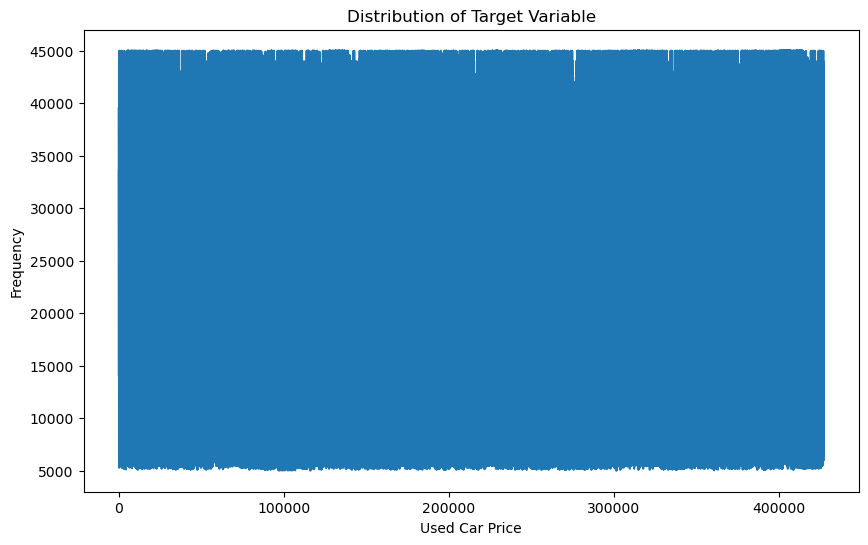

In [64]:
#Hist plot of the target variable after removing outliers
plt.figure(figsize=(10, 6))
plt.plot(cars['price'])
plt.title('Distribution of Target Variable')
plt.xlabel('Used Car Price')
plt.ylabel('Frequency')
plt.show()

In [65]:
#removing cols for id and VIN mnumber as they are unique ids for the data and do not contribute to inference in price  
#removing additional cols to reduce model complexity - manfacturerr and region both have signfnicant number of category values and 
#one hot encoding the columns results in signfnificant increase in the # of cols, size has over 70% missing data

cars = cars.drop(['id', 'VIN', 'region', 'model','size'], axis=1)


In [66]:
#replacing missing values in remaining category cols with value other

cars["manufacturer"].fillna("No manufacturer", inplace = True)
cars["condition"].fillna("No condition", inplace = True)
cars["cylinders"].fillna("No cylinders", inplace = True)
cars["fuel"].fillna("No fuel", inplace = True)
cars["title_status"].fillna("No title_status", inplace = True)
cars["transmission"].fillna("No transmission", inplace = True)
cars["drive"].fillna("No drive", inplace = True)
#cars["size"].fillna("No size", inplace = True)
cars["type"].fillna("No type", inplace = True)
cars["paint_color"].fillna("No paint_color", inplace = True)



In [67]:
#convert years to age especially if the regression involved higher degree polynomials
cars['age'] = (cars['year'].max() + 1) - cars['year']
cars.drop('year', axis=1, inplace=True)


#### Split dataset into train, test
ALWAYS before feature engineering and modeling
The primary reason for performing a train/test split before feature engineering and modeling is to prevent data leakage and to ensure that the evaluation of your model is accurate and indicative of its performance on unseen data.

- Prevention of Data Leakage
- Accurate Evaluation
- Ethical Modeling Practices

In [68]:
X = cars.drop('price', axis=1)
y = cars['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Feature engineering
Included but not limited to for analysis :

- Handling categorical attributes
    - Ordinal encoder: Assumes two nearby values are more similar to each other
    - One-Hot encoder: One binary category per attribute
- Custom feature engineering
- Feature scaling
    - MinMax
    - Standarization


- post anlaysis dertmined colks that need one hot encoding
    - One Hot encoding : manufacturer, cylinders, conditions, fuel, title status, tranmission, drive, size, type, paint color, state

In [69]:
#one hot enoding the training data

encoder=OneHotEncoder(sparse_output=False)

cols = ['condition', 'cylinders','fuel', 'title_status', 'transmission', 'drive', 'manufacturer','paint_color', 'type', 'state']

train_X_encoded = pd.DataFrame (encoder.fit_transform(X_train[cols]))

train_X_encoded.columns = encoder.get_feature_names_out(cols)

X_train.drop(cols ,axis=1, inplace=True)

X_train = pd.concat([X_train.reset_index(drop=True), train_X_encoded ], axis='columns')


In [70]:
#one hot enoding the test data

test_X_encoded = pd.DataFrame (encoder.transform(X_test[cols]))

test_X_encoded.columns = encoder.get_feature_names_out(cols)

X_test.drop(cols ,axis=1, inplace=True)

X_test = pd.concat([X_test.reset_index(drop=True), test_X_encoded ], axis='columns')


In [71]:
X_test.shape

(51431, 157)

In [72]:
X_train.shape

(205720, 157)

In [73]:
# Create a linear regression model and test baseline model score

linreg = LinearRegression()
        
# Fit the logistic regression classifier to the training set with the selected features
linreg.fit(X_train, y_train)

# Evaluate the model on the test set with the selected features
print(f"Model score with selected features: {linreg.score(X_test, y_test):.3f}")



Model score with selected features: 0.734


In [74]:
#performing sequential feature selection and selecting 5 features to see model performance

# Create a linear regression
linreg = LinearRegression()

# Create the SequentialFeatureSelector object
sfs = SequentialFeatureSelector(linreg, n_features_to_select=5, direction='forward')
    
# Fit the SequentialFeatureSelector
sfs.fit(X_train, y_train)
    
# Transform the dataset to only include the selected features
X_train_selected = sfs.transform(X_train)
X_test_selected = sfs.transform(X_test)
    
# Fit the linear regression  to the training set with the selected features
linreg.fit(X_train_selected, y_train)

# Print which features were selected
selected_features = sfs.get_support()
    
print("# of selected features : ", 5)
print("Selected features:", [X_train.columns[i] for i in range(len(selected_features)) if selected_features[i]])
    
# Evaluate the model on the test set with the selected features
print(f"Model score with selected features: {linreg.score(X_test_selected, y_test):.3f}")

# of selected features :  5
Selected features: ['odometer', 'age', 'cylinders_8 cylinders', 'fuel_diesel', 'drive_fwd']
Model score with selected features: 0.601


In [169]:
X_train_selected = pd.DataFrame(X_train_selected, columns=sfs.get_feature_names_out())
X_test_selected = pd.DataFrame(X_test_selected, columns=sfs.get_feature_names_out())

In [76]:
#checking performance of polynomial degree features. Due to the number of cols, limited to selected 5 features and 3 degrees

train_mses_ = []
test_mses_ = []
for i in range(1, 4):
    pipe = Pipeline([('pfeat', PolynomialFeatures(degree = i, include_bias=False)), 
                    ('linreg', LinearRegression())])
    pipe.fit(X_train_selected, y_train)
    train_preds_ = pipe.predict(X_train_selected)
    test_preds_ = pipe.predict(X_test_selected)
    train_mses_.append(mean_squared_error(y_train, train_preds_))
    test_mses_.append(mean_squared_error(y_test, test_preds_))
    print("Test MSE for model ", i , " is : ", mean_squared_error(y_test, test_preds_) )
    print(f"Model score is s: {pipe.score(X_test_selected, y_test):.3f}")
    
print(" Best model is polynomial : ", test_mses_.index(min(test_mses_)) + 1)

Test MSE for model  1  is :  44344908.29499503
Model score is s: 0.601
Test MSE for model  2  is :  42281312.731445916
Model score is s: 0.619
Test MSE for model  3  is :  86247751.59438528
Model score is s: 0.224
 Best model is polynomial :  2


In [ ]:
# Conclusion : After performing sequential feature selection and polynomial degree regressions, model score has fallen sigfincantly 
#due to the reduced feature set. second degree polynomial features has marginally increased model score. Running the regression
# with 2nd degree polynominal transformation with all 127 features may yield higher model score but given constraints of capacity moving
#forward regression of all 127 features at first degree 

In [77]:
#scaling the features before modelling
std_scaler = StandardScaler()
scaled_train = std_scaler.fit_transform(X_train)
X_train= pd.DataFrame(scaled_train, columns = std_scaler.get_feature_names_out())

scaled_test = std_scaler.transform(X_test)
X_test= pd.DataFrame(scaled_test, columns = std_scaler.get_feature_names_out())


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [78]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
}

In [79]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Linear Regression: RMSE = 5436.8278, R2 = 0.7339
Ridge Regression: RMSE = 5436.4281, R2 = 0.7340


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.532e+10, tolerance: 2.301e+09
  model = cd_fast.enet_coordinate_descent(


Lasso Regression: RMSE = 5436.4067, R2 = 0.7340
Elastic Net Regression: RMSE = 5826.3760, R2 = 0.6944


Lasso Regression has the best performance among the four models with the lowest RMSE and the highest R2 value. It is the most suitable model for this dataset based on the given metrics.

-  **RMSE (Root Mean Squared Error) = 5436.4067**: This value indicates the average error in the predictions. In this context, it means that on average, the model's predictions are off by about 5441 units/dollars from the actual values of used car prices.

-  **R2 (R-squared) = 0.7340**: This value indicates that approximately 73.4% of the variance in the target variable (used car price) is explained by the features in the model. While this is a high level of explanation, it also indicates that there is still some amount of unexplained variance, suggesting room for model improvement.

In [83]:
#Cross Validation and Hyperparameter Tuning

import warnings
warnings.filterwarnings('ignore')

# Define the parameter grid for Ridge, Lasso, and Elastic Net
param_grid = {
    'Ridge': {'alpha': [0.1, 1.0, 10.0, 100.0]},
    'Lasso': {'alpha': [0.01, 0.1, 1.0, 10.0]},
    'ElasticNet': {'alpha': [0.01, 0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.7, 0.9]}
}

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(tol=1e-2),
    'ElasticNet': ElasticNet()
}

# Perform cross-validation and hyperparameter tuning
best_models = {}
for name, model in models.items():
    if name in param_grid:
        grid = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
        grid.fit(X_train, y_train)
        best_models[name] = grid.best_estimator_
        best_rmse = np.sqrt(-grid.best_score_)
        print(f"Best {name}: {grid.best_params_}, RMSE = {best_rmse:.4f}")
    else:
        # For Linear Regression, just perform cross-validation
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE
        best_models[name] = model
        print(f"{name}: Cross-validation RMSE = {rmse_scores.mean():.4f}")

print()
print('Evaluate the best models on the test set')
results = {}
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Linear Regression: Cross-validation RMSE = 175122228406815.5625
Best Ridge: {'alpha': 100.0}, RMSE = 5441.8690
Best Lasso: {'alpha': 1.0}, RMSE = 5441.8500
Best ElasticNet: {'alpha': 0.01, 'l1_ratio': 0.9}, RMSE = 5441.8701

Evaluate the best models on the test set
Linear Regression: RMSE = 5436.8278, R2 = 0.7339
Ridge: RMSE = 5436.4049, R2 = 0.7340
Lasso: RMSE = 5436.4250, R2 = 0.7340
ElasticNet: RMSE = 5436.3824, R2 = 0.7340


The linear regression performance remains unchanged as expected since Linear Regression does not have hyperparameters to tune. It serves as a baseline for comparison.

Based on the post-tuning metrics, Riidge Regression is the best performing model with the lowest RMSE and highest R2 score, making it the preferred choice for user car prices in this context.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Given the results of the previous section, we'll proceed with the best Ridge model for further analysis.

Ridge Regression has the best performance after GridSearchCV among all the models with the lowest RMSE and the highest R2 value. It is the most suitable model for this dataset based on the given metrics.

**RMSE (Root Mean Squared Error) = 5436.4049**: This value indicates the average error in the predictions. In this context, it means that on average, the model's predictions are off by about 5436.4049 units or dollars from the actual values of used car prices

**R2 (R-squared) = 0.7340**: This value indicates that approximately 73.34% of the variance in the target variable (user car price prediction) is explained by the features in the model. While this is a high level of explanation, it also indicates that there is still a some amount of unexplained variance, suggesting room for model improvement.

In [84]:
X_train.head(10)

,odometer,age,condition_No condition,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_10 cylinders,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,-0.833662,0.652265,1.288001,-0.558605,-0.03652,-0.704608,-0.231998,-0.039532,-0.018841,-0.047133,...,-0.051823,-0.175751,-0.237565,-0.050823,-0.153688,-0.086105,-0.170494,-0.172820,-0.053356,-0.038406
1,-0.694272,-0.175843,-0.776397,-0.558605,-0.03652,1.419230,-0.231998,-0.039532,-0.018841,-0.047133,...,-0.051823,-0.175751,-0.237565,-0.050823,-0.153688,-0.086105,-0.170494,5.786369,-0.053356,-0.038406
2,-0.997835,-0.727916,-0.776397,-0.558605,-0.03652,1.419230,-0.231998,-0.039532,-0.018841,-0.047133,...,-0.051823,-0.175751,-0.237565,-0.050823,-0.153688,-0.086105,-0.170494,-0.172820,-0.053356,-0.038406
3,-1.325990,-0.451880,-0.776397,-0.558605,-0.03652,1.419230,-0.231998,-0.039532,-0.018841,-0.047133,...,-0.051823,-0.175751,-0.237565,-0.050823,-0.153688,-0.086105,-0.170494,-0.172820,-0.053356,-0.038406
4,-1.085974,-1.003952,1.288001,-0.558605,-0.03652,-0.704608,-0.231998,-0.039532,-0.018841,-0.047133,...,-0.051823,5.689853,-0.237565,-0.050823,-0.153688,-0.086105,-0.170494,-0.172820,-0.053356,-0.038406
5,-0.156830,0.376229,1.288001,-0.558605,-0.03652,-0.704608,-0.231998,-0.039532,-0.018841,-0.047133,...,-0.051823,-0.175751,-0.237565,-0.050823,-0.153688,-0.086105,-0.170494,5.786369,-0.053356,-0.038406
6,0.322030,-0.727916,-0.776397,1.790172,-0.03652,-0.704608,-0.231998,-0.039532,-0.018841,-0.047133,...,-0.051823,-0.175751,-0.237565,-0.050823,-0.153688,-0.086105,-0.170494,-0.172820,-0.053356,-0.038406
7,0.044402,1.756409,-0.776397,-0.558605,-0.03652,1.419230,-0.231998,-0.039532,-0.018841,-0.047133,...,-0.051823,-0.175751,-0.237565,-0.050823,6.506677,-0.086105,-0.170494,-0.172820,-0.053356,-0.038406
8,0.965320,0.100193,-0.776397,1.790172,-0.03652,-0.704608,-0.231998,-0.039532,-0.018841,-0.047133,...,-0.051823,-0.175751,-0.237565,-0.050823,-0.153688,-0.086105,-0.170494,-0.172820,-0.053356,-0.038406
9,-0.977399,-1.556024,-0.776397,-0.558605,-0.03652,1.419230,-0.231998,-0.039532,-0.018841,-0.047133,...,-0.051823,-0.175751,-0.237565,-0.050823,-0.153688,-0.086105,-0.170494,-0.172820,-0.053356,-0.038406


In [85]:
# Use the best ridge model to make predictions
best_ridge_model = best_models['Ridge']
y_pred = best_ridge_model.predict(X_test)

# Create a DataFrame to show actual vs. predicted values
actual_vs_predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_predicted_df.head()

,Actual,Predicted
125462,21590,18544.739466
150868,26995,24722.738146
328260,12500,13606.685240
146254,17990,16279.816738
262388,34990,29042.744108


#### Interpret the Coefficients and Y-Intercept
Ridge regression provides the coefficients of the features and the intercept. These values help us understand the relationship between each feature and the target variable. 

Considering we have 127 features (scaled) in the regression model, we will use the top 5 highest value coefficients to generate inferences from the model (age, odometer, fuel_diesel, cylinders_8 cylinders drive_fwd)

In [86]:
# Get the coefficients and the intercept from the best Ridge model
coefficients = pd.Series(best_ridge_model.coef_, index=X_train.columns)
intercept = best_ridge_model.intercept_

print("Ridge Regression Coefficients:")
print(coefficients.sort_values())
print("\nIntercept:", intercept)

print("Ridge Regression Coefficients in ascending order of coeff :")
print(np.abs(coefficients).sort_values(ascending = False))

Ridge Regression Coefficients:
age                     -4378.855959
odometer                -3081.794259
drive_fwd               -1142.712257
cylinders_4 cylinders   -1117.629581
type_sedan               -978.270934
                            ...     
type_truck                963.964833
type_pickup               971.415532
drive_4wd                1092.821785
cylinders_8 cylinders    1268.208055
fuel_diesel              1653.165794
Length: 157, dtype: float64

Intercept: 20726.88326852032
Ridge Regression Coefficients in ascending order of coeff :
age                      4378.855959
odometer                 3081.794259
fuel_diesel              1653.165794
cylinders_8 cylinders    1268.208055
drive_fwd                1142.712257
                            ...     
paint_color_purple          2.655507
state_ne                    1.177762
state_wy                    0.578643
state_nd                    0.481869
state_sd                    0.157797
Length: 157, dtype: float64


In general:

- Coefficient Value: The value of each coefficient represents the expected change in the target variable for a one-unit change in the corresponding feature, assuming all other features remain constant.
- Intercept: The intercept represents the expected value of the target variable when all features are zero.

#### Specific Interpretation for the Used Car Dataset


- **age**:
For one std deviation increase in age(scaled feature), the expected decrease in the target variable (used car price) is 4387 units (or dollars). This indicates a strong negative relationship between age and user car price , meaning older cars is associated with lower used car prices.

- **odometer** :For one std deviation increase in odometer reading(scaled feature), the expected decrease in the target variable (used car price) is 3080 units (or dollars). This indicates a strong negative relationship between odometer rating and user car price , meaning cars with higher reading is associated with lower used car prices.

- **fuel_diesel** :Diesel engine (encoded feature) results in expected increase of 1659 units  in the target variable (used car price). This indicates a positive relationship  which means used cars with diesel engine have a higher price (on average 1659$) compared to other engines

- **cylinders_8 cylinders** : 8 Cylinder engines (encoded feature) results in expected increase of 1268 units  in the target variable (used car price). This indicates a positive relationship  which means used cars with 8 cylinder engines have a higher price (on average 1277$) compared to other engines (4 cylinders, 12 cylinders etc)

- **drive_fwd**: Front wheel drive (encoded feature) results in expected decrease of 1142 units  in the target variable (used car price). This indicates a negative relationship  which means used cars with front wheel drives have a lower price (on average 1144$) compared to types of cars (4 wheel drives, rear wheel drives etc)



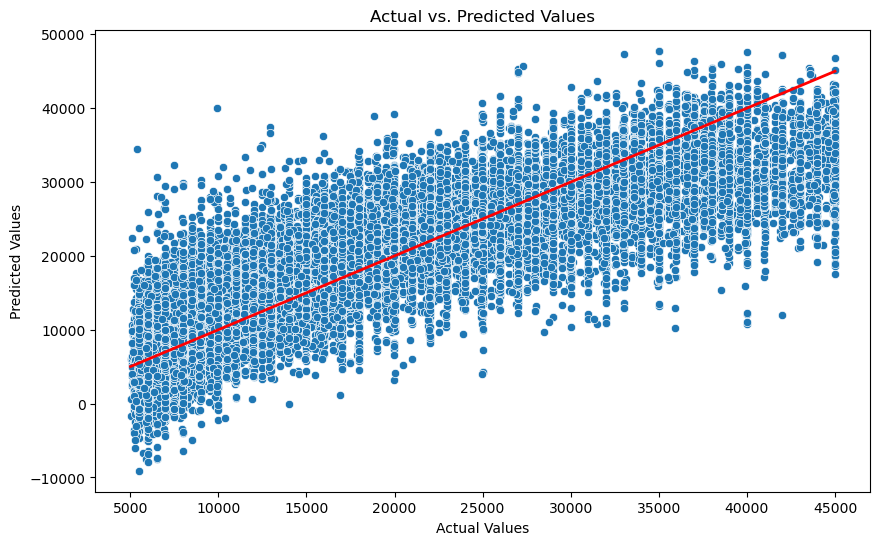

In [87]:

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=actual_vs_predicted_df)
plt.plot([actual_vs_predicted_df['Actual'].min(), actual_vs_predicted_df['Actual'].max()],
         [actual_vs_predicted_df['Actual'].min(), actual_vs_predicted_df['Actual'].max()],
         color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.savefig("images/regressionscatter.png")
plt.show()

Each point on the scatter plot represents a single observation from the test set. The position of each point shows the actual value (x-coordinate) and the predicted value (y-coordinate) for that observation.

The red line represents the line of perfect prediction, where the predicted values exactly match the actual values (y = x). Points on this line indicate perfect predictions by the model.

In [88]:
print(coefficients.index)

Index(['odometer', 'age', 'condition_No condition', 'condition_excellent',
       'condition_fair', 'condition_good', 'condition_like new',
       'condition_new', 'condition_salvage', 'cylinders_10 cylinders',
       ...
       'state_sd', 'state_tn', 'state_tx', 'state_ut', 'state_va', 'state_vt',
       'state_wa', 'state_wi', 'state_wv', 'state_wy'],
      dtype='object', length=157)


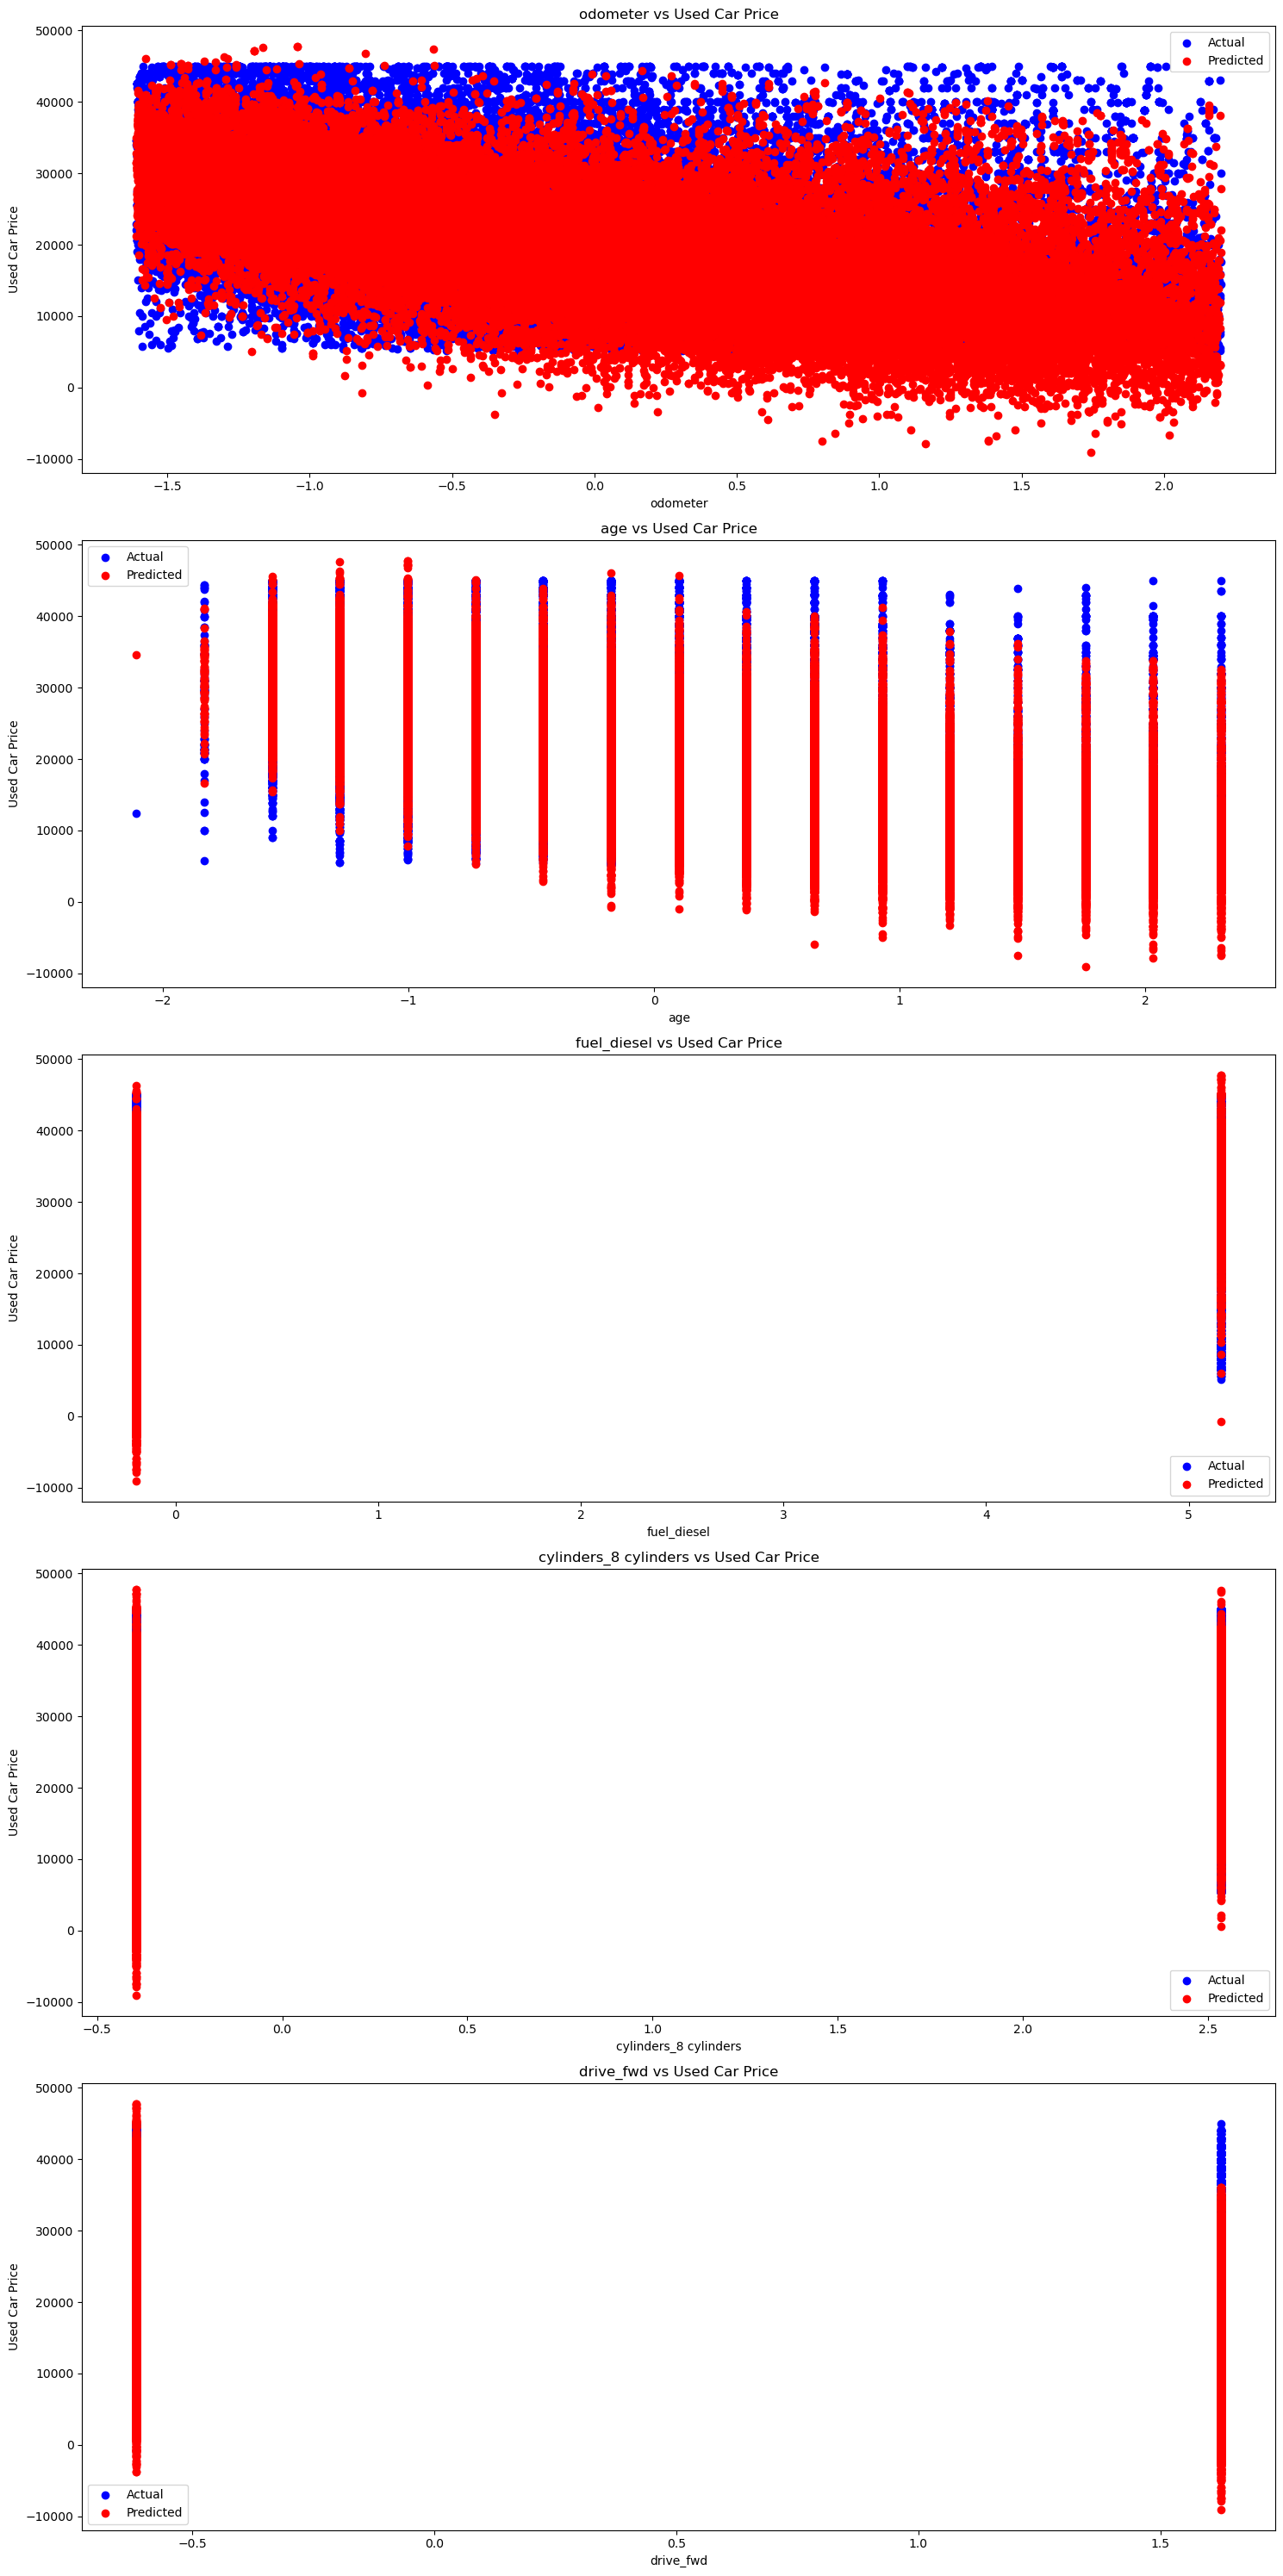

In [89]:

import matplotlib.pyplot as plt

# Get the selected features from the model
selected_features = ['odometer', 'age', 'fuel_diesel', 'cylinders_8 cylinders',  'drive_fwd'] # coefficients.index[:6]

# Create scatter plots for each selected feature against the target variable
plt.figure(figsize=(15, 30))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(len(selected_features), 1, i)
    plt.scatter(X_test[feature], y_test, color='blue', label='Actual')
    plt.scatter(X_test[feature], y_pred, color='red', label='Predicted')
    plt.xlabel(f'{feature}')
    plt.ylabel('Used Car Price')
    plt.title(f'{feature} vs Used Car Price')
    plt.legend()

plt.tight_layout()
plt.show()


#### Conclusions

##### Business Understanding Recap

Used car market is a growing business and dealers play an important role in building and expanding the market.The goal of this anlaysis is to determine what factors in a used car are valued by potential buyers which will ultimately determine the price of the used car. This will help used car dealers to deivise strategies to improve the profitability and growth


##### Key Findings


| Feature           | Coefficient  | Impact          | Insight                                                                                                   |
|-------------------|--------------|-----------------|-----------------------------------------------------------------------------------------------------------|
| Age               |  -4378.855959 | Strong Negative | older cars are associated with lower used car prices                                                     |
| Odometer          |-3081.794259 | Strong Negative | Cars with higher odometer reading is associated with lower used car prices.                                |
| Fuel Diesel       |  1653.165794  | Postive         | Diesel engine have a higher price (on average 1659$) compared to other engines                           |
| 8 Cylinders       |  1268.208055  | Positive        | Cars with 8 cylinder  have a higher price compared to other engines |
| Front Wheel Drive | -1142.712257 | Negative        | Cars with front wheel drives have a lower price compared to other types of cars|


##### Key Reccomendations

- **Low Age & Mileage** : Age & Odometer readings are a critical attributes which drives the price of the used car. Maintaing an inventory with lower age and odometer reading will enable dealdership to charge higher prices for their used car sales
- **Attractiveness** : Consider adding more inventory of cars with features which drive higher pricing - Diesel engines, All/Rear Wheel drives and 8 cylinders. 
- **Incentives** : Dealership should consider designing incentives to drive sales. Consider offerring incentives on cars with front wheel drives
- **Improving profitability** : consider utilizing the model to predict the prize of car before procuring them on a go-forward basis. This will help reduce the cost of inventory and help maximize profitability


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

To deploy and implement the ridge regression model in a real-world scenario, we need to cover the following steps:

- Save the trained model to a file for future use.
- Load the saved model and use it to make predictions on new data.
- Implement a function that takes new used card data and returns the predicted used car price.
- Use a web framework like Flask or a dashboarding tool like Tableau to create an API endpoint that serves predictions